In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
lyrics_df = pd.read_csv("ML data.csv", usecols=['lyrics', 'length_log', 'Mood'])
lyrics_df

,lyrics,Mood,length_log
0,i dont feel good i dont sound good i dont look...,1,6.496775
1,i think my friend said i hear footstep i wore ...,0,6.545350
2,after salli came it like we fell apart no more...,0,7.160846
3,seem to matter what i do so im save this 4 you...,0,6.673298
4,and you know exact what they say turn the othe...,0,7.098376
...,...,...,...
106457,everi littl star abov know the one i love swee...,1,6.322565
106458,the sun still hangin in the sky and the world ...,0,6.635947
106459,broken and push too far ill fold up neat and d...,0,6.799056
106460,the moment i saw him smile i knew he was just ...,0,6.463029


In [3]:
v = TfidfVectorizer(max_features=1000)
x = v.fit_transform(lyrics_df['lyrics'])

df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
lyrics_df.drop('lyrics', axis=1, inplace=True)
res = pd.concat([lyrics_df, df1], axis=1)
res

,Mood,length_log,about,abov,across,act,afraid,after,again,against,...,yesterday,yet,yo,you,youd,youll,young,your,yourself,youv
0,1,6.496775,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.108345,0.000000,0.098703,0.0,0.043974,0.0,0.00000
1,0,6.545350,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.050121,0.0,0.00000
2,0,7.160846,0.050228,0.000000,0.0,0.0,0.0,0.070027,0.0,0.0,...,0.0,0.000000,0.0,0.143269,0.072362,0.000000,0.0,0.124603,0.0,0.00000
3,0,6.673298,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.098831,0.0,0.280904,0.000000,0.000000,0.0,0.155468,0.0,0.00000
4,0,7.098376,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.164743,0.000000,0.000000,0.0,0.055720,0.0,0.02484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106457,1,6.322565,0.000000,0.182162,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.304594,0.000000,0.000000,0.0,0.000000,0.0,0.00000
106458,0,6.635947,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.151306,0.000000,0.000000,0.0,0.000000,0.0,0.00000
106459,0,6.799056,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.072342,0.000000,0.000000,0.0,0.029361,0.0,0.00000
106460,0,6.463029,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000


In [4]:
res.to_csv("df for model (after TFIDF.csv")

In [5]:
X = res.drop('Mood', 1)
y = res['Mood']

X_raw_train, X_raw_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
X_raw_train.shape

(74523, 1001)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


cls_pipe = Pipeline([('clf', LinearSVC())])
cls_pipe.fit(X_raw_train, y_trai
y_predict = cls_pipe.predict(X_raw_test)

C:\Users\niv14\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


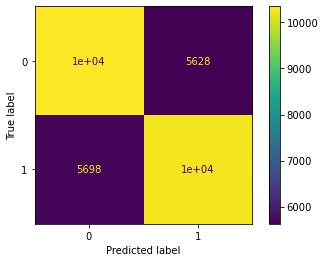

In [7]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(cls_pipe, X_raw_test, y_test)  
plt.show()

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("accuracy = ", accuracy_score(y_test, y_predict))
print("precision = ", precision_score(y_test, y_predict))
print("recall = ", recall_score(y_test, y_predict))

accuracy =  0.6453865180500329
precision =  0.6459041147602869
recall =  0.6430719118015535
